In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv')
df

C:\Users\utkar\AppData\Local\Temp\ipykernel_35120\4082628254.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [3]:
df[df['host name'] == '']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
df.rename(columns={'NAME':'name'}, inplace=True)

In [7]:
df.isnull().sum()

id                                     0
name                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
df.drop(df[df['host name'] == ''].index, inplace=True)

In [9]:
df['price'] = df['price'].replace({'\$': ''}, regex=True)  
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [10]:
df['service fee'] = df['service fee'].replace({'\$': '', ' ': ''}, regex=True)  
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce') 

In [11]:
df.isnull().sum()

id                                     0
name                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                              18150
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [12]:
df.drop(columns={'house_rules', 'country code', 'last review', 'country', 'host id', 'lat','reviews per month', 'minimum nights', 'Construction year', 'long', 'license','review rate number', 'calculated host listings count'}, inplace=True)

In [13]:
df.isnull().sum()

id                            0
name                        250
host_identity_verified      289
host name                   406
neighbourhood group          29
neighbourhood                16
instant_bookable            105
cancellation_policy          76
room type                     0
price                     18150
service fee                 273
number of reviews           183
availability 365            448
dtype: int64

In [14]:
df.dropna(subset=['name','cancellation_policy','number of reviews','neighbourhood group', 'neighbourhood', 'instant_bookable','host_identity_verified', 'host name','availability 365', 'price','service fee'], inplace=True)

In [15]:
df.isnull().sum()

id                        0
name                      0
host_identity_verified    0
host name                 0
neighbourhood group       0
neighbourhood             0
instant_bookable          0
cancellation_policy       0
room type                 0
price                     0
service fee               0
number of reviews         0
availability 365          0
dtype: int64

In [16]:
df[['price','availability 365','number of reviews', 'service fee']].describe()

,price,availability 365,number of reviews,service fee
count,82967.000000,82967.000000,82967.000000,82967.000000
mean,524.595683,141.235793,27.297419,104.918341
std,273.387353,135.046267,49.071021,54.678970
min,50.000000,-10.000000,0.000000,10.000000
25%,288.000000,3.000000,1.000000,58.000000
50%,524.000000,96.000000,7.000000,105.000000
75%,759.000000,269.000000,30.000000,152.000000
max,999.000000,426.000000,1024.000000,200.000000


C:\Users\utkar\AppData\Local\Temp\ipykernel_35120\4235560700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability 365'])


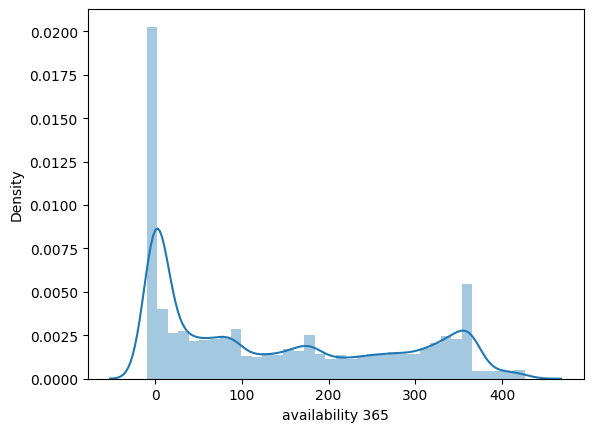

In [17]:
sns.distplot(df['availability 365'])  
plt.grid(False)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27b5b29c790>,
 'caps': [<matplotlib.lines.Line2D at 0x27b598ef8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b598ea410>],
 'medians': [<matplotlib.lines.Line2D at 0x27b598a7d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b59b2ff90>],
 'means': []}

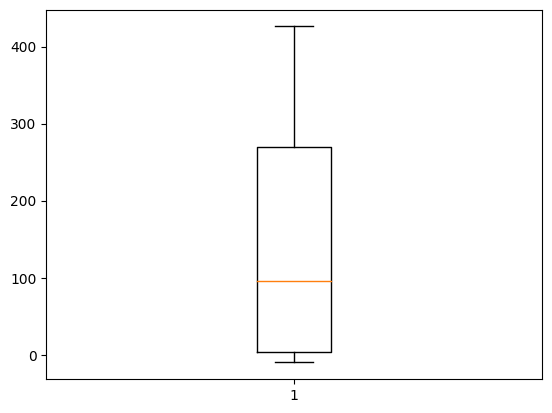

In [18]:
plt.boxplot(df['availability 365'])

In [19]:
df.drop(df[df['availability 365'] > 365].index, inplace=True)

In [20]:
df.drop(df[df['availability 365'] < 1].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x27b59911510>,
 'caps': [<matplotlib.lines.Line2D at 0x27b59905ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b59913590>],
 'medians': [<matplotlib.lines.Line2D at 0x27b598fe250>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b59906990>],
 'means': []}

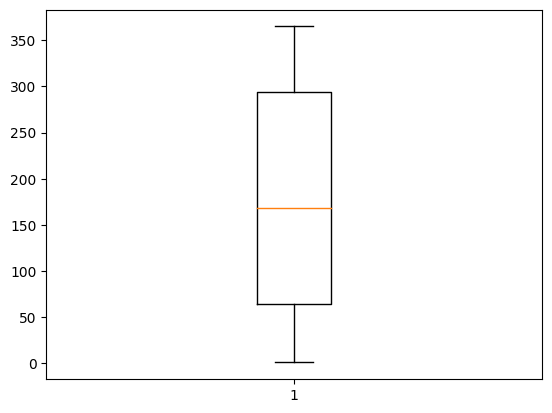

In [21]:
plt.boxplot(df['availability 365'])

In [22]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [23]:
def remove_special_characters(text):
 
    cleaned_text = text.encode('ascii', 'ignore').decode('ascii')
    return cleaned_text

df['host name'] = df['host name'].apply(remove_special_characters)

In [24]:
df['host name'] = df['host name'].replace({'\$': ''}, regex=True)  
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [25]:
df.shape

(60985, 13)

# Exploratory Data Analysis

# Total Guests

In [26]:
df['id'].count()

60985

# Total Hotels

In [27]:
df['name'].nunique()

40110

# Total Hosts

In [28]:
df['host name'].nunique()

9835

# Host Verification Status

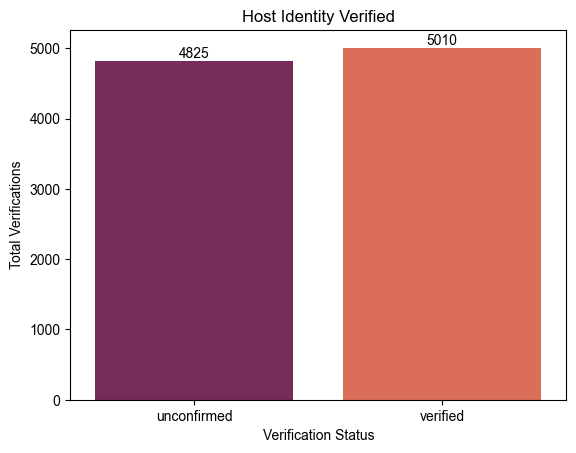

In [29]:
unique_hosts = df.drop_duplicates(subset=['host name'])[['host name', 'host_identity_verified']]

# Plot the count of host identities verified
verification = sns.countplot(x='host_identity_verified', data=unique_hosts, palette='rocket')
for bars in verification.containers:
    verification.bar_label(bars)
plt.title('Host Identity Verified')
plt.xlabel('Verification Status')
plt.ylabel('Total Verifications')
sns.set_style("whitegrid")
plt.grid(False)
plt.show()

# Top 20 Hosts who attended the most guests

In [30]:
host = df.groupby('host name')['id'].count().sort_values(ascending=False).head(20)
host

host name
Michael         478
Sonder (NYC)    425
David           400
John            357
Karen           313
Alex            303
Maria           276
Blueground      257
Michelle        253
Daniel          248
Sarah           230
Anna            230
Chris           227
Andrew          213
Jeniffer        211
Mike            210
Jessica         200
Kara            196
Ken             195
Amy             189
Name: id, dtype: int64

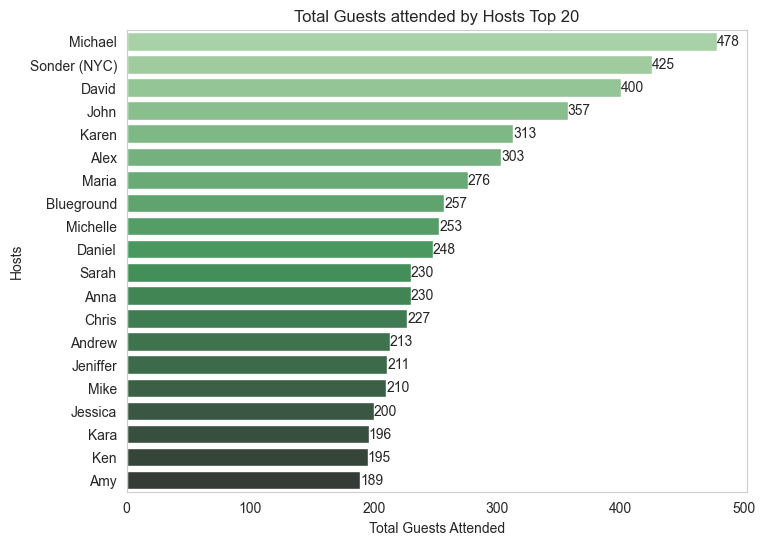

In [31]:
plt.figure(figsize=(8,6))
barplot = sns.barplot(y=host.index, x=host.values, orient='horizontal', palette='Greens_d')
plt.bar_label(barplot.containers[0], labels=host.values, label_type='edge')
plt.title('Total Guests attended by Hosts Top 20')
plt.xlabel('Total Guests Attended')
plt.ylabel('Hosts')
plt.grid(False)
plt.show()

# Total Guests By Neighbourhood Group

In [32]:
neighbourhood_group = df.groupby('neighbourhood group')['id'].count().sort_values(ascending=False).head(20)
neighbourhood_group

neighbourhood group
Manhattan        25820
Brooklyn         23946
Queens            8596
Bronx             1919
Staten Island      703
brookln              1
Name: id, dtype: int64

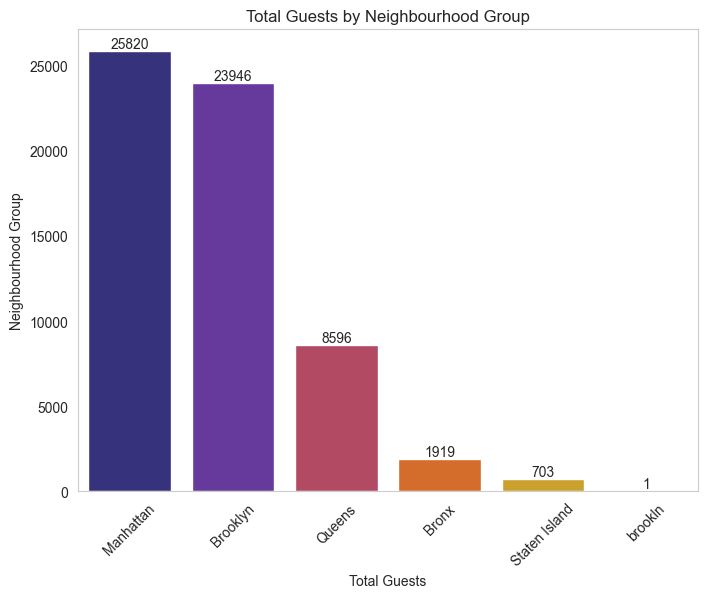

In [33]:
plt.figure(figsize=(8,6))
barplot3 = sns.barplot(x=neighbourhood_group.index, y=neighbourhood_group.values, orient='vertical', palette='CMRmap')
plt.bar_label(barplot3.containers[0], labels=neighbourhood_group, label_type='edge')
plt.title('Total Guests by Neighbourhood Group')
plt.xlabel('Total Guests')
plt.ylabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Total Guests By Neighbourhood

In [34]:
neighbourhood = df.groupby('neighbourhood')['id'].count().sort_values(ascending=False).head(20)
neighbourhood

neighbourhood
Bedford-Stuyvesant    4743
Williamsburg          4072
Harlem                3222
Bushwick              2674
Hell's Kitchen        2570
Upper West Side       2228
Midtown               2199
Upper East Side       2162
Crown Heights         1873
East Village          1861
Chelsea               1340
East Harlem           1310
Lower East Side       1179
Greenpoint            1106
Astoria               1065
Washington Heights    1048
Financial District     989
East Flatbush          867
West Village           810
Flatbush               690
Name: id, dtype: int64

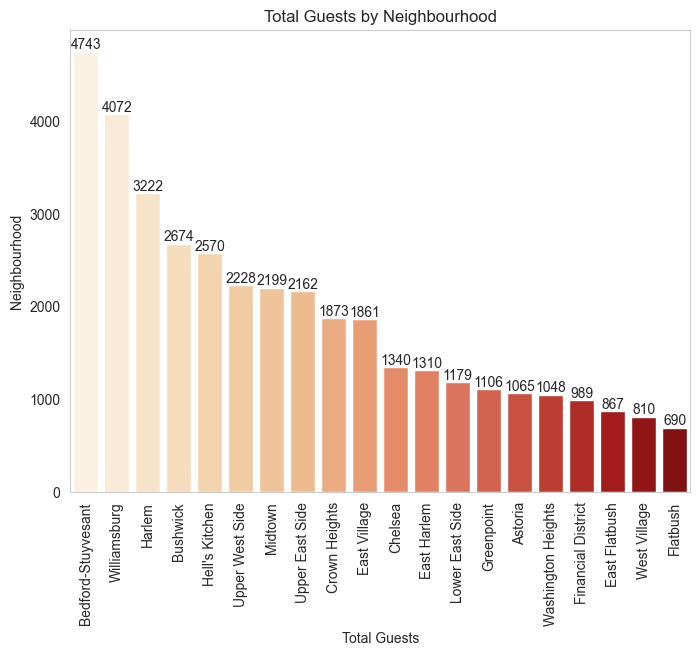

In [35]:
plt.figure(figsize=(8,6))
barplot2 = sns.barplot(x=neighbourhood.index, y=neighbourhood.values, orient='vertical', palette='OrRd')
plt.bar_label(barplot2.containers[0], labels=neighbourhood, label_type='edge')
plt.title('Total Guests by Neighbourhood')
plt.xlabel('Total Guests')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

# 365 Days Availability

In [36]:
availability_365 = df[df['availability 365'] == 365]


count_availability_365 =availability_365['name'].nunique()
count_availability_365

1426

# Instant Booking

In [37]:
instant_booking = df.groupby('instant_bookable')['id'].count()   
instant_booking

instant_bookable
False    30708
True     30277
Name: id, dtype: int64

# Cancellations Policy

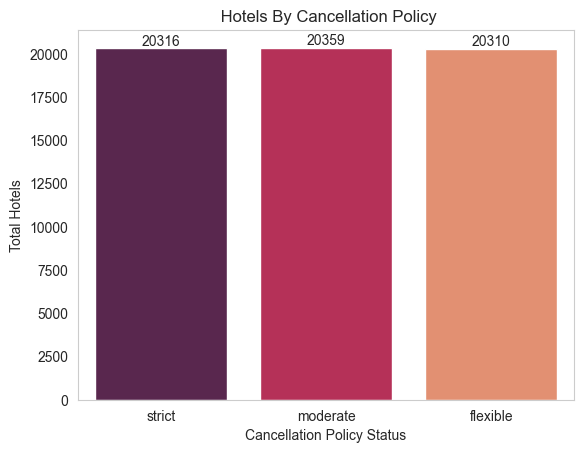

In [38]:
cancellation_policy = sns.countplot(x=df['cancellation_policy'], data=df, palette='rocket')
for bars in cancellation_policy.containers:
    cancellation_policy.bar_label(bars)
plt.title(' Hotels By Cancellation Policy')  
plt.xlabel('Cancellation Policy Status')
plt.ylabel('Total Hotels')
sns.set_style("whitegrid")
plt.grid(False)
plt.show() 

# Room Type

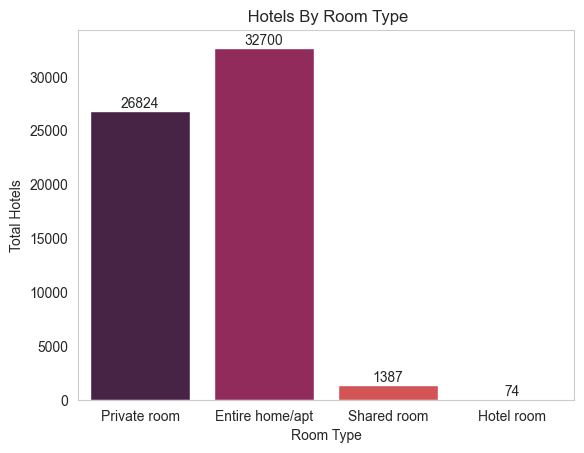

In [39]:
room_type = sns.countplot(x=df['room type'], data=df, palette='rocket')
for bars in room_type.containers:
    room_type.bar_label(bars)
plt.title(' Hotels By Room Type')  
plt.xlabel('Room Type')
plt.ylabel('Total Hotels')
sns.set_style("whitegrid")
plt.grid(False)
plt.show() 

# Price Distribution

In [40]:
df['price'] = df['price'].replace({'\$': ''}, regex=True)  
df['price'] = pd.to_numeric(df['price'], errors='coerce')

C:\Users\utkar\AppData\Local\Temp\ipykernel_35120\2268909099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


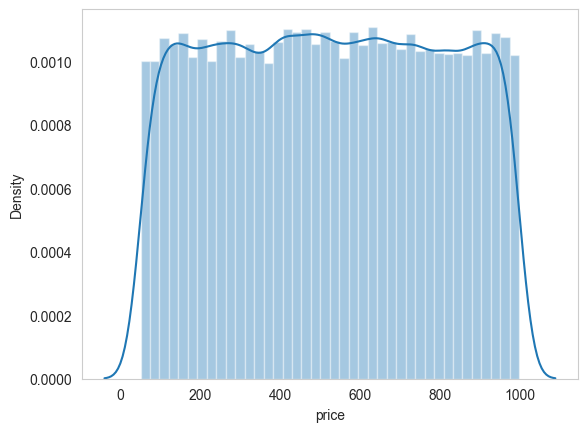

In [41]:
sns.distplot(df['price'])  
plt.grid(False)
plt.show()

# Top most Expensive Hotels

In [42]:
hotel_price_h = df.groupby('name')['price'].max().sort_values(ascending=False).head(25)
hotel_price_h

name
BEAUTIFUL ROOM & PRIVATE BATHROOM...QUEENS, NY        999.0
Sunny Brooklyn apt. Quick walk to Prospect Park       999.0
new york home                                         999.0
Big room new apartment in Williamsburg                999.0
Queen Room in Prospect Lefferts Gardens Flatbush      999.0
Luxury One Bdrm Condo @TimeSquare                     999.0
Beautiful bedroom in spacious designer apartment      999.0
Park Slope Brownstone Garden Apartment                999.0
Private room in lovely people house                   999.0
"Harlem Duplex from 7/20-8/20 perfect for Family"     999.0
Chic and Cozy West Village 1 Bedroom Home             999.0
Private Bedroom A in Bushwick Minutes from Subways    999.0
Bohemian 2 Bedroom in the East Village                999.0
Private Bedroom in Manhattan                          999.0
Tranquility Suite: Upper West Side (UWS) 1 Bedroom    999.0
Nanna’s Piano!! Recently Renovated 2 Story Home       999.0
Comfy room in Manhattan 4 blocks fr

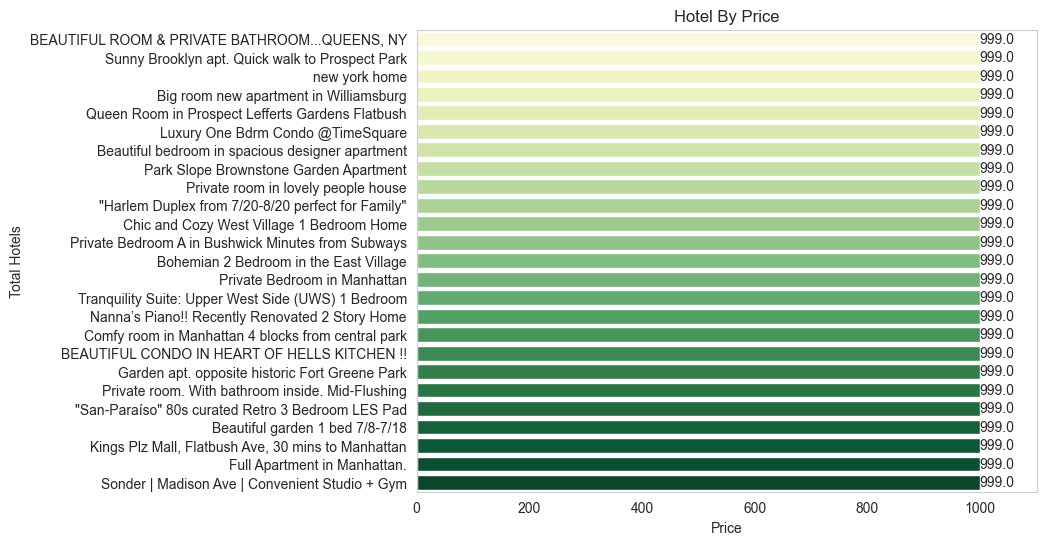

In [43]:
plt.figure(figsize=(8,6))
barplot4 = sns.barplot(y=hotel_price_h.index, x=hotel_price_h.values, orient='horizontal', palette='YlGn')
plt.bar_label(barplot4.containers[0], labels=hotel_price_h.values, label_type='edge')
plt.title('Hotel By Price')
plt.ylabel('Total Hotels')
plt.xlabel('Price')
plt.xlim(0,1100)
plt.grid(False)
plt.show()

# Average Price By Room Type

In [44]:
avg_price_room = df.groupby('room type')['price'].mean().sort_values(ascending=False)
avg_price_room

room type
Hotel room         558.810811
Entire home/apt    527.050245
Private room       523.009432
Shared room        519.197549
Name: price, dtype: float64

# Moving Average of Price

In [45]:
df['moving_average'] = df['price'].rolling(window=7).mean()

In [46]:
df[['price', 'moving_average']].head(20)

,price,moving_average
0,966.0,NaN
1,142.0,NaN
4,204.0,NaN
10,319.0,NaN
11,606.0,NaN
13,580.0,NaN
14,149.0,423.714286
35,191.0,313.000000
37,203.0,321.714286
41,563.0,373.000000


# Service fee Distribution

C:\Users\utkar\AppData\Local\Temp\ipykernel_35120\14655831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['service fee'])


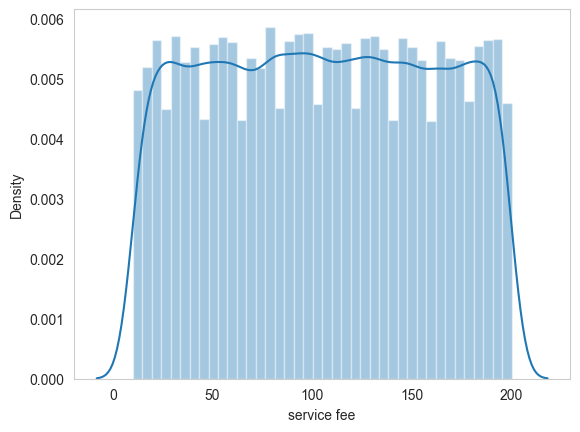

In [47]:
sns.distplot(df['service fee'])  
plt.grid(False)
plt.show()

# Hotel with highest Number of Review

In [48]:
highest_no_of_review = df.loc[df['number of reviews'].idxmax()]

print('Hotel Name:', highest_no_of_review['name'])
print('No of Reviews:', highest_no_of_review['number of reviews'])

Hotel Name: Sonder Battery Park | Studio Apartment
No of Reviews: 1024.0


<Axes: xlabel='service fee', ylabel='price'>

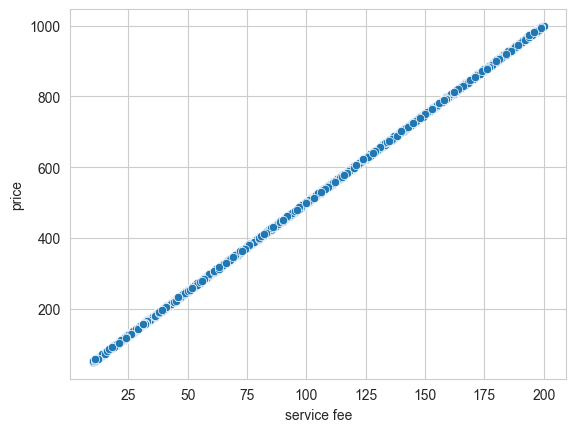

In [49]:
sns.scatterplot(x=df['service fee'], y=df['price'])

# Insights

Total number of guests are 60985

Total Hotels are 40110

There are 9835 number of hosts out of which only 5010 are verified

Michael has attended the most guest 478, followed by Sonder 425

Number Of Hotels With 365 days Availability are 1426

Total Hotels By Neighbourhood Group: highest Manhattan 25820

Total Hotels By Neighbourhood: Bedford-Stuyvesant 4743

Only 30277 hotels has instant booking system

20316 hotels has strict cancellation policy

Entire home/apartment is the most preferred choice of stay in

Price distribution is somewhat uniform,  max price of hotel is  $999, 𝑎𝑣𝑒𝑟𝑎𝑔𝑒 524

Average price of each room type:
Hotel room $558

Shared room $519

Private room $523

Entire home/apt $527


Service fee is also uniformally distributed, with average of $105

With increase in hotel price service fee also increases

Average number of reviews is 31.8, highest is for Sonder Battery Park | Studio Apartment: 1024

More cancellation flexibility should be provided for other room type & may be few discount offers if want to boost booking for
other room types

365 days availability should be provide by more hotels

Price of Home rooms are high that could be the potential reason for less booking so offers should be provided to invite more
guests

In [226]:
df.to_csv('C:\\Users\\utkar\\OneDrive\\Documents\\New_Airbnb_dataset.csv')